In [1]:
import os

import fastf1
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error
from sklearn.pipeline import Pipeline

In [2]:
seed: int = 1042
np.random.seed(seed)

In [3]:
basepath: str = "c:/Users/paulw/OneDrive/Desktop/GitHub/005_Formula_One"
fastf1.Cache.enable_cache(os.path.join(basepath, "data/cache"))

In [4]:
session_2024 = fastf1.get_session(2024, "BAHRAIN", "R")
session_2024.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data f

In [5]:
session_2024.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [6]:
cols = ["Driver", "LapTime", "Sector1Time", "Sector2Time", \
        "Sector3Time", "SpeedI1", "SpeedI2", "Compound", \
        "FreshTyre", "TrackStatus", "Team"]

In [7]:
## Extract lap times and driver names

laps_2024 = session_2024.laps[cols].copy()

In [8]:
laps_2024.dropna(subset="LapTime", inplace=True)
laps_2024.dropna(subset="Sector1Time", inplace=True)
laps_2024.dropna(subset="SpeedI1", inplace=True)

In [9]:
for col in ["LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]:
    laps_2024[col] = laps_2024[col].dt.total_seconds()

In [10]:
## 2025 Qualifying Data

qualifying_2025 = fastf1.get_session(2025, "BAHRAIN", "Q")
qualifying_2025.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 

In [11]:
qlaps = qualifying_2025.laps[cols].copy()

In [12]:
qlaps.dropna(subset=["LapTime"], inplace=True)
qlaps.dropna(subset=["Sector1Time"], inplace=True)
qlaps.dropna(subset=["SpeedI1"], inplace=True)

In [13]:
for col in ["LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]:
    qlaps[col] = qlaps[col].dt.total_seconds()

In [14]:
qlaps['Team'].replace('Racing Bulls', 'RB', inplace=True)

C:\Users\paulw\AppData\Local\Temp\ipykernel_18964\2061996253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  qlaps['Team'].replace('Racing Bulls', 'RB', inplace=True)


In [15]:
drivers_2024 = set(laps_2024['Driver'])
drivers_2025 = set(qlaps['Driver'])

driver_scores = {driver: 1 if driver in drivers_2024 and driver in drivers_2025 else 0 for driver in drivers_2024.union(drivers_2025)}
driver_scores

{'HUL': 1,
 'BEA': 0,
 'ALO': 1,
 'TSU': 1,
 'SAI': 1,
 'BOR': 0,
 'ZHO': 0,
 'PIA': 1,
 'PER': 0,
 'VER': 1,
 'HAD': 0,
 'OCO': 1,
 'STR': 1,
 'RIC': 0,
 'DOO': 0,
 'ANT': 0,
 'LEC': 1,
 'MAG': 0,
 'SAR': 0,
 'NOR': 1,
 'LAW': 0,
 'GAS': 1,
 'BOT': 0,
 'HAM': 1,
 'ALB': 1,
 'RUS': 1}

In [16]:
teams_2024 = set(laps_2024['Team'])
teams_2025 = set(qlaps['Team'])

teams_scores = {team: 1 if team in teams_2024 and team in teams_2025 else 0 for team in teams_2024.union(teams_2025)}
teams_scores

{'Haas F1 Team': 1,
 'Aston Martin': 1,
 'Red Bull Racing': 1,
 'Williams': 1,
 'McLaren': 1,
 'Ferrari': 1,
 'Mercedes': 1,
 'RB': 1,
 'Alpine': 1,
 'Kick Sauber': 1}

In [17]:
laps_2024['Driver_Exp'] = laps_2024['Driver'].map(driver_scores)
qlaps['Driver_Exp'] = qlaps['Driver'].map(driver_scores)

In [18]:
laps_2024['Team_Exp'] = laps_2024['Team'].map(teams_scores)
qlaps['Team_Exp'] = qlaps['Team'].map(teams_scores)

In [19]:
laps_2024['Experience'] = laps_2024['Driver_Exp'] + laps_2024['Team_Exp']
qlaps['Experience'] = qlaps['Driver_Exp'] + qlaps['Team_Exp']

In [20]:
df = pd.merge(laps_2024, qlaps, on="Driver", suffixes=("_2024", "_2025"))
df.head()

,Driver,LapTime_2024,Sector1Time_2024,Sector2Time_2024,Sector3Time_2024,SpeedI1_2024,SpeedI2_2024,Compound_2024,FreshTyre_2024,TrackStatus_2024,...,Sector3Time_2025,SpeedI1_2025,SpeedI2_2025,Compound_2025,FreshTyre_2025,TrackStatus_2025,Team_2025,Driver_Exp_2025,Team_Exp_2025,Experience_2025
0,VER,96.296,30.916,41.661,23.719,232.0,248.0,SOFT,False,1,...,29.134,241.0,273.0,SOFT,True,1,Red Bull Racing,1,1,2
1,VER,96.296,30.916,41.661,23.719,232.0,248.0,SOFT,False,1,...,22.894,242.0,275.0,SOFT,True,1,Red Bull Racing,1,1,2
2,VER,96.296,30.916,41.661,23.719,232.0,248.0,SOFT,False,1,...,35.538,197.0,191.0,SOFT,True,1,Red Bull Racing,1,1,2
3,VER,96.296,30.916,41.661,23.719,232.0,248.0,SOFT,False,1,...,27.671,242.0,269.0,SOFT,False,1,Red Bull Racing,1,1,2
4,VER,96.296,30.916,41.661,23.719,232.0,248.0,SOFT,False,1,...,22.957,242.0,275.0,SOFT,True,1,Red Bull Racing,1,1,2


In [21]:
if len(df) == 0:
    raise ValueError("No data available for the selected drivers.")

In [22]:
compound_mapping = {'SOFT': 0, 'MEDIUM': 1, 'HARD': 2}
df['Compound_2024'] = df['Compound_2024'].map(compound_mapping)

qlaps['Compound'] = qlaps['Compound'].map(compound_mapping)

In [23]:
df['FreshTyre_2024'] = df['FreshTyre_2024'].astype(int)
qlaps['FreshTyre'] = qlaps['FreshTyre'].astype(int)

In [24]:
X = df[["Sector1Time_2024", "Sector2Time_2024", "Sector3Time_2024", \
            'SpeedI1_2024', 'SpeedI2_2024', "Compound_2024", "FreshTyre_2024", \
            'Driver_Exp_2024', 'Team_Exp_2024', "Experience_2024"]].values
y = df["LapTime_2024"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Build Linear regression

In [25]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [26]:
linear_regression.score(X_test, y_test)

1.0

In [27]:
predcols = ["Sector1Time", "Sector2Time", "Sector3Time", \
            'SpeedI1', 'SpeedI2', "Compound", "FreshTyre", \
            'Driver_Exp', 'Team_Exp', "Experience"]

In [28]:
qlaps['LapTime_2025_Pred'] = linear_regression.predict(qlaps[predcols].values)

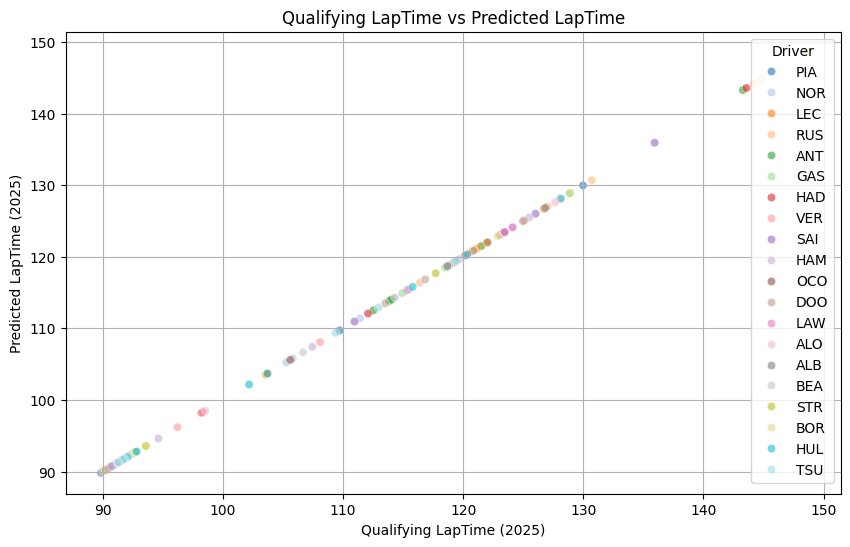

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=qlaps, x='LapTime', y='LapTime_2025_Pred', hue='Driver', palette='tab20', alpha=0.6)
plt.title('Qualifying LapTime vs Predicted LapTime')
plt.xlabel('Qualifying LapTime (2025)')
plt.ylabel('Predicted LapTime (2025)')
plt.grid(True)
plt.show()

In [30]:
fastest_laps = qlaps.groupby('Driver')['LapTime_2025_Pred'].min().reset_index()
fastest_laps.rename(columns={'LapTime': 'FastestLapTime'}, inplace=True)
fastest_laps

,Driver,LapTime_2025_Pred
0,ALB,92.040
1,ALO,91.634
2,ANT,90.213
3,BEA,92.373
4,BOR,92.186
5,DOO,91.245
6,GAS,90.216
7,HAD,91.271
8,HAM,90.772
9,HUL,91.693


In [31]:
# Sort the fastest laps by predicted lap time
fastest_laps_sorted = fastest_laps.sort_values(by="LapTime_2025_Pred", ascending=True)

# Predict the winner (driver with the fastest lap)
predicted_winner = fastest_laps_sorted.iloc[0]["Driver"]

print(f"Predicted Winner of the 2025 Bahrain GP: {predicted_winner}")
fastest_laps_sorted

Predicted Winner of the 2025 Bahrain GP: PIA


,Driver,LapTime_2025_Pred
14,PIA,89.841
15,RUS,90.009
11,LEC,90.175
2,ANT,90.213
6,GAS,90.216
12,NOR,90.267
19,VER,90.423
16,SAI,90.680
8,HAM,90.772
18,TSU,91.228


In [32]:
mean_absolute_error(y_test, linear_regression.predict(X_test))

1.0299004203589028e-13

Let's move to a more complicated model

In [33]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed)
gb.fit(X_train, y_train)

c:\Users\paulw\OneDrive\Desktop\GitHub\005_Formula_One\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=1042)

In [34]:
gb.score(X_test, y_test)

0.9999003763441561

In [35]:
qlaps['LapTime_2025_Pred_GB'] = gb.predict(qlaps[predcols].values)

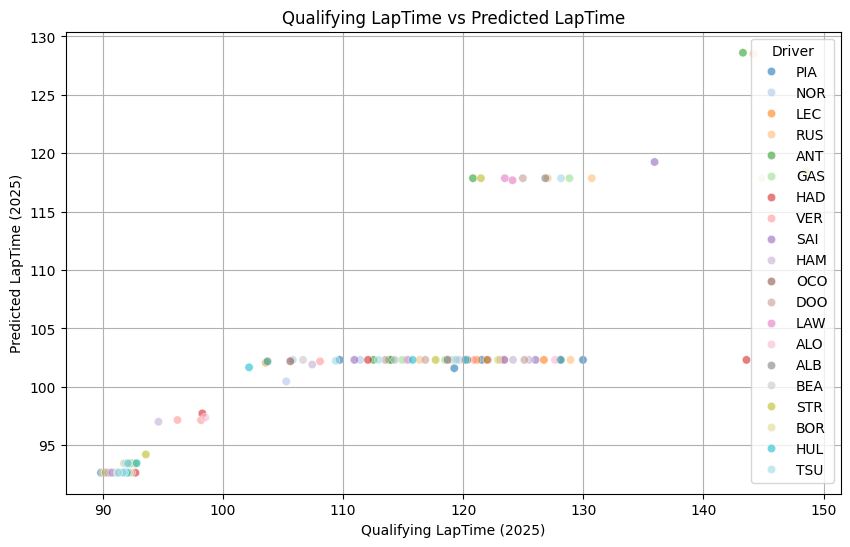

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=qlaps, x='LapTime', y='LapTime_2025_Pred_GB', hue='Driver', palette='tab20', alpha=0.6)
plt.title('Qualifying LapTime vs Predicted LapTime')
plt.xlabel('Qualifying LapTime (2025)')
plt.ylabel('Predicted LapTime (2025)')
plt.grid(True)
plt.show()

In [38]:
fastest_laps = qlaps.groupby('Driver')['LapTime_2025_Pred_GB'].min().reset_index()
fastest_laps.rename(columns={'LapTime': 'FastestLapTime'}, inplace=True)
fastest_laps

,Driver,LapTime_2025_Pred_GB
0,ALB,92.654941
1,ALO,92.644567
2,ANT,92.644567
3,BEA,92.644567
4,BOR,92.644567
5,DOO,92.644567
6,GAS,92.644567
7,HAD,92.644567
8,HAM,92.644567
9,HUL,92.644567


In [39]:
# Sort the fastest laps by predicted lap time
fastest_laps_sorted = fastest_laps.sort_values(by="LapTime_2025_Pred_GB", ascending=True)

# Predict the winner (driver with the fastest lap)
predicted_winner = fastest_laps_sorted.iloc[0]["Driver"]

print(f"Predicted Winner of the 2025 Bahrain GP: {predicted_winner}")
fastest_laps_sorted

Predicted Winner of the 2025 Bahrain GP: ALO


,Driver,LapTime_2025_Pred_GB
1,ALO,92.644567
2,ANT,92.644567
3,BEA,92.644567
4,BOR,92.644567
6,GAS,92.644567
5,DOO,92.644567
7,HAD,92.644567
8,HAM,92.644567
12,NOR,92.644567
9,HUL,92.644567


In [40]:
mean_absolute_error(y_test, gb.predict(X_test))

0.03809010741120103